# **Million Domains and Counting**
---

*By: Kyle W. Brown*

This analysis reviews the top domains that are global ranked through Majestic Million, a database of a million domains that find the most referring subnets. Free search and download of the top million websites, from the world's largest commercially available backlink database. The [majestic_million.csv](https://downloads.majestic.com/majestic_million.csv) dataset is from [Majestic](https://majestic.com/)

## About Majestic

Majestic offers leading-edge support for SEOs, Developers, Digital Entrepreneurs, Analysts, Businesses, Online marketing professionals and Affiliate Managers. The largest commercial link intelligence database in the world, Majestic crawls the web and views around a billion URLs a day. They analyze the data via their Flow Metrics algorithm and share the results so that you can illuminate your business presence on the web, and improve your Search Engine Ranking.


## Data

The data can be found here:

https://downloads.majestic.com/majestic_million.csv

In [5]:
import pandas as pd

# Loading data fom Raw Git csv
domains = pd.read_csv('https://raw.githubusercontent.com/tianhuil/design-data/main/data/majestic_million.csv?token=AMCCLAEHZDKK4DUKMRI2Y6TAWGY4K')

In [3]:
domains.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,facebook.com,com,499868,2872434,facebook.com,com,1,1,500047,2873112
1,2,2,google.com,com,499340,2682315,google.com,com,2,2,499182,2680338
2,3,3,youtube.com,com,456055,2373913,youtube.com,com,3,3,456219,2373321
3,4,4,twitter.com,com,443183,2290940,twitter.com,com,4,4,443218,2291339
4,5,5,instagram.com,com,365641,1779588,instagram.com,com,5,5,365622,1779227


## Top 10 Global Ranked SEO Domains

A top-level domain is one of the domains at the highest level in the hierarchical Domain Name System of the Internet. The top-level domain names are installed in the root zone of the name space. For all domains in lower levels, it is the last part of the domain name, that is, the last label of a fully qualified domain name. (Wikipedia)

In [ ]:
# Create the top_10_domains pandas series
top_10_domains = domains.loc[:, ["GlobalRank", "Domain"]].head(10)
top_10_domains

,GlobalRank,Domain
0,1,facebook.com
1,2,google.com
2,3,youtube.com
3,4,twitter.com
4,5,instagram.com
5,6,linkedin.com
6,7,microsoft.com
7,8,apple.com
8,9,wikipedia.org
9,10,googletagmanager.com


## Top-Level Domains (TLD) Breakdown for Majestic 

In [8]:
s = domains.TLD
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


pd.DataFrame({'Counts': counts, 'Percent': percent, 'Percent(%)': percent100}).head(10)

,Counts,Percent,Percent(%)
com,501962,0.501962,50.2%
org,84189,0.084189,8.4%
net,45659,0.045659,4.6%
ru,33723,0.033723,3.4%
de,31954,0.031954,3.2%
cn,26529,0.026529,2.7%
uk,25042,0.025042,2.5%
jp,16192,0.016192,1.6%
nl,13995,0.013995,1.4%
fr,9777,0.009777,1.0%


## Top 10 TLD's Visualization

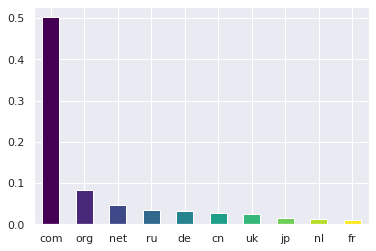

In [12]:
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

viridis = cm.get_cmap('viridis', 10)

percent = percent.head(10)
percent.plot(kind='bar', color=viridis.colors, rot=0);

# Correlation Analysis

In [10]:
domains.corr()

,GlobalRank,TldRank,RefSubNets,RefIPs,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
GlobalRank,1.000000,0.485593,-0.277883,-0.132431,0.952988,0.467172,-0.278885,-0.133296
TldRank,0.485593,1.000000,-0.134880,-0.071046,0.463131,0.979723,-0.135372,-0.070928
RefSubNets,-0.277883,-0.134880,1.000000,0.912237,-0.271571,-0.133061,0.999881,0.912028
RefIPs,-0.132431,-0.071046,0.912237,1.000000,-0.130448,-0.070173,0.912275,0.999719
PrevGlobalRank,0.952988,0.463131,-0.271571,-0.130448,1.000000,0.490521,-0.269772,-0.129146
PrevTldRank,0.467172,0.979723,-0.133061,-0.070173,0.490521,1.000000,-0.132183,-0.069548
PrevRefSubNets,-0.278885,-0.135372,0.999881,0.912275,-0.269772,-0.132183,1.000000,0.912220
PrevRefIPs,-0.133296,-0.070928,0.912028,0.999719,-0.129146,-0.069548,0.912220,1.000000


As expected GlobalRank and TldRank are closely correlated (49%), surprising RefSubNets and RefIPs account for a 91% correlation. Besides the stated correlations the dataset provides interesting correlations among all fields.

## Correlation Heatmap

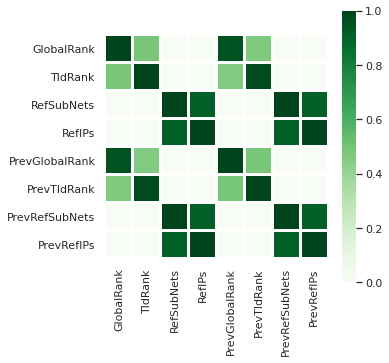

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corr = domains.corr()

ax1 = sns.heatmap(corr, cbar=6, linewidths=2,vmax=1, vmin=0, square=True, cmap='Greens')
plt.rcParams['figure.figsize'] = [7, 5]
plt.show()